##### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Load the dataset

In [4]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [9]:
print(df.iloc[3,1])

Skills â¢ R â¢ Python â¢ SAP HANA â¢ Tableau â¢ SAP HANA SQL â¢ SAP HANA PAL â¢ MS SQL â¢ SAP Lumira â¢ C# â¢ Linear Programming â¢ Data Modelling â¢ Advance Analytics â¢ SCM Analytics â¢ Retail Analytics â¢Social Media Analytics â¢ NLP Education Details 
January 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology
January 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University
Data Science Consultant 

Consultant - Deloitte USI
Skill Details 
LINEAR PROGRAMMING- Exprience - 6 months
RETAIL- Exprience - 6 months
RETAIL MARKETING- Exprience - 6 months
SCM- Exprience - 6 months
SQL- Exprience - Less than 1 year months
Deep Learning- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
R- Exprience - Less than 1 year monthsC

##### Separate the input and output variables

In [11]:
# input data
x = df['Resume']

# output data
y = df['Category']

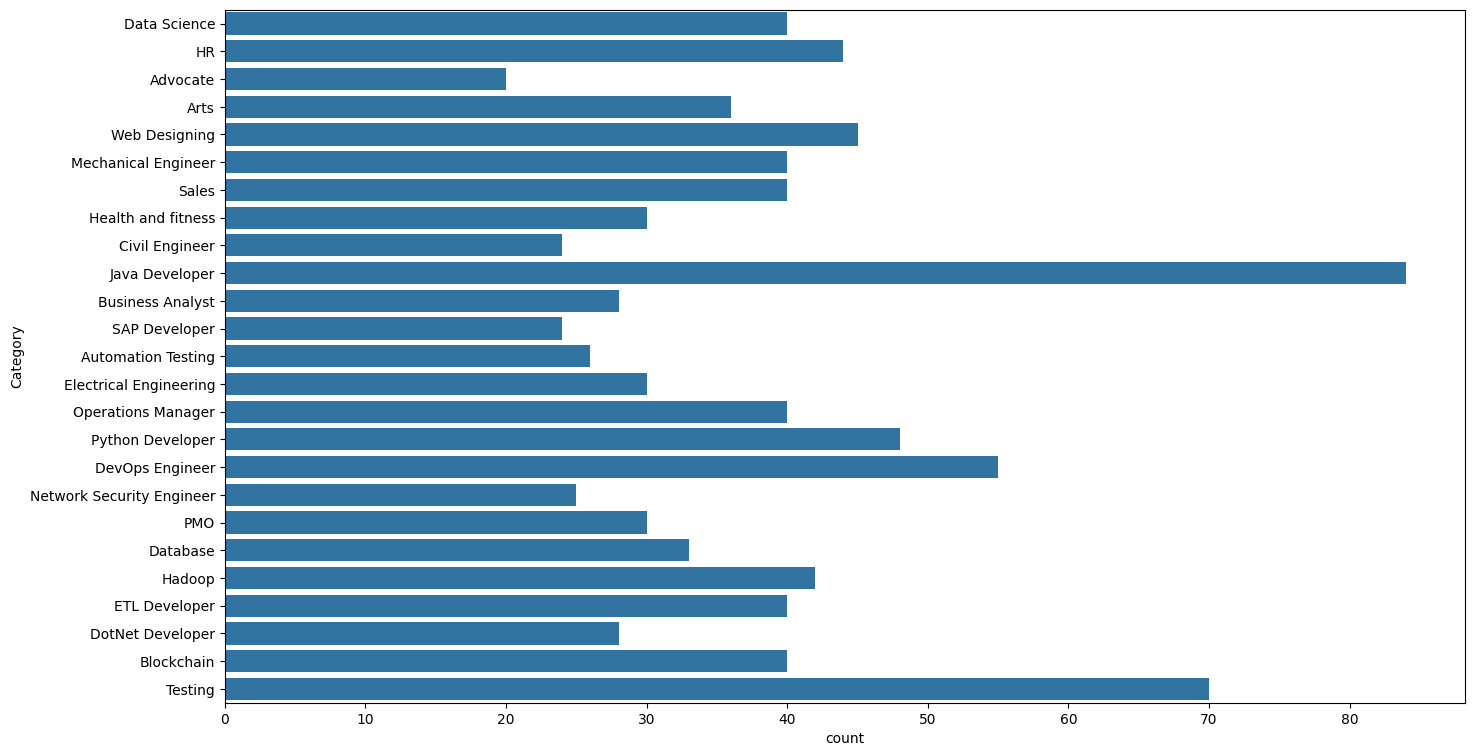

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(y);

In [14]:
y.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

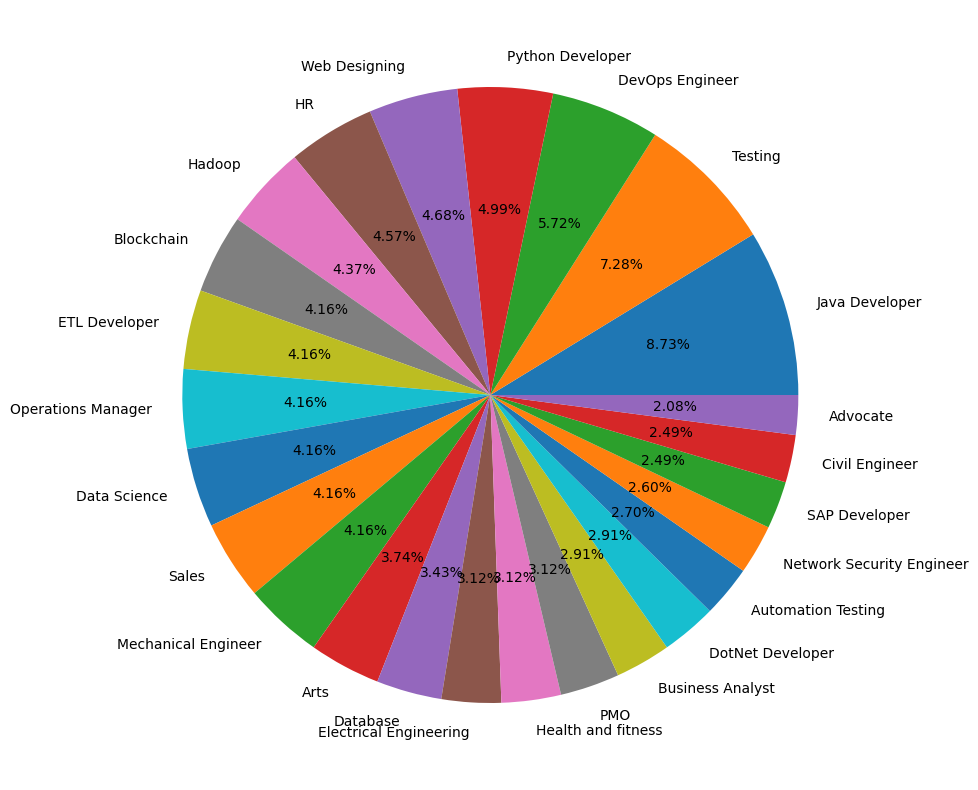

In [15]:
plt.figure(figsize=(10,10))
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%2.2f%%');

##### Define the cleaning function

In [17]:
import re, string

In [18]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ', resumeText) # URLS
    resumeText = re.sub('RT|cc',' ', resumeText)      # RT | cc
    resumeText = re.sub('#\S+',' ', resumeText)       # Hashtags
    resumeText = re.sub('@\S+',' ', resumeText)       # mentions and email-id
    resumeText = re.sub('[%s]' %re.escape(string.punctuation),' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # keep ASCII
    resumeText = re.sub('\s+',' ', resumeText) # extra whitespaces
    return resumeText

In [25]:
sent = 'हॅलो Hi! @mahesh how are you?\t\nHave you seen https://fb.com? #trend'

In [26]:
cleanResume(sent)

' Hi how are you Have you seen '

In [27]:
x[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [28]:
cleanResume(x[0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [30]:
cleaned = x.apply(cleanResume)

In [32]:
cleaned_data = cleaned.sum()

In [34]:
cleaned_data;

In [35]:
len(cleaned_data)

2803381

In [36]:
from wordcloud import WordCloud

In [45]:
wcloud = WordCloud(background_color='white', 
                   max_words=100).generate(cleaned_data)

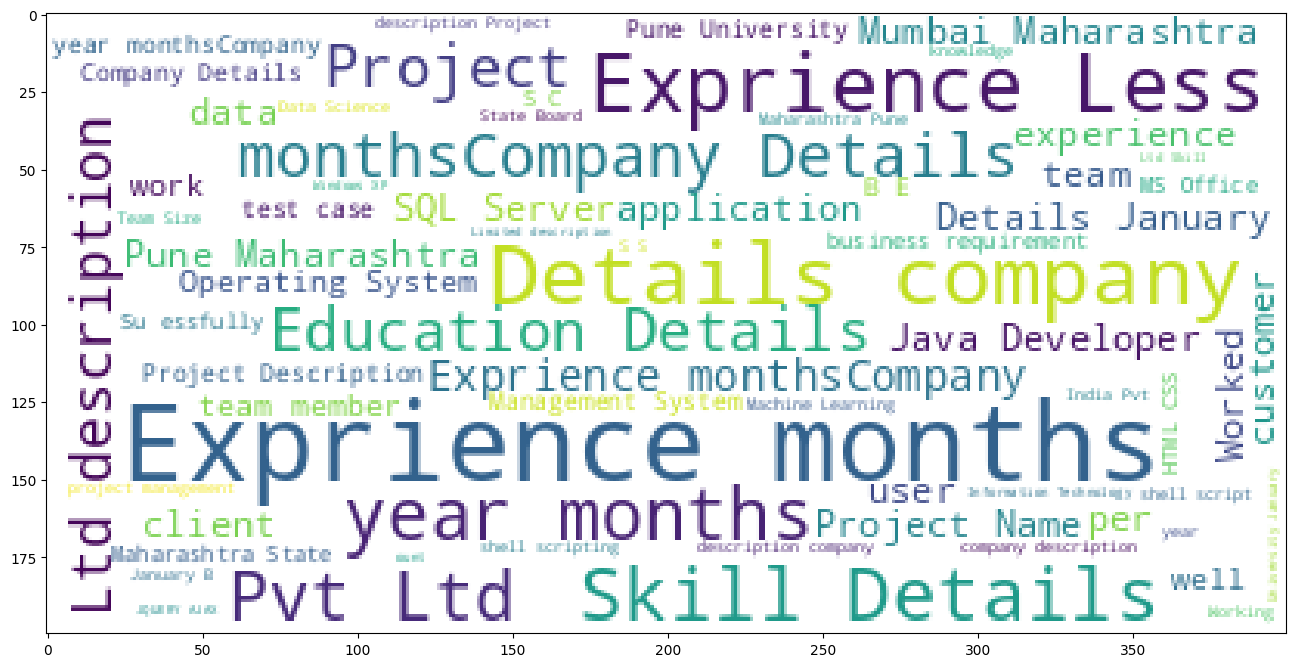

In [46]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [47]:
wcloud.words_

{'Exprience months': 1.0,
 'Details company': 0.5502304147465438,
 'Exprience Less': 0.523963133640553,
 'Skill Details': 0.4433179723502304,
 'year months': 0.4235023041474654,
 'Pvt Ltd': 0.4023041474654378,
 'monthsCompany Details': 0.343778801843318,
 'Education Details': 0.3230414746543779,
 'Project': 0.31797235023041476,
 'Ltd description': 0.2907834101382488,
 'Exprience monthsCompany': 0.24055299539170508,
 'Details January': 0.18755760368663593,
 'Pune Maharashtra': 0.1815668202764977,
 'SQL Server': 0.17327188940092167,
 'data': 0.16129032258064516,
 'per': 0.15898617511520738,
 'client': 0.1585253456221198,
 'application': 0.1534562211981567,
 'customer': 0.14838709677419354,
 'team': 0.14516129032258066,
 'Worked': 0.14285714285714285,
 'user': 0.13410138248847928,
 'Java Developer': 0.12903225806451613,
 'Mumbai Maharashtra': 0.12857142857142856,
 'experience': 0.12165898617511521,
 'Project Name': 0.11428571428571428,
 'Operating System': 0.11290322580645161,
 'team memb

In [48]:
cleaned.shape

(962,)

In [49]:
y.shape

(962,)

##### TF*IDF Vectorization

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer(stop_words='english')

In [53]:
x_new = tfidf.fit_transform(cleaned)

In [54]:
x_new.shape

(962, 7351)

In [55]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

##### Cross - Validation

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(
    x_new, y, random_state=0, stratify=y)

In [59]:
x_train.shape, x_test.shape

((721, 7351), (241, 7351))

##### Build the model

In [61]:
from sklearn.neighbors import NearestCentroid

In [62]:
nc = NearestCentroid()

In [63]:
nc.fit(x_train, y_train)

NearestCentroid()

In [65]:
nc.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

##### Performance Evaluation

In [68]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [69]:
y_pred = nc.predict(x_test)

<Figure size 1600x1600 with 0 Axes>

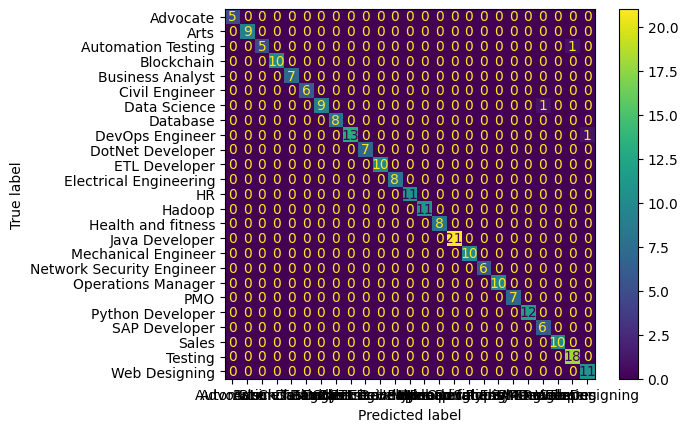

In [73]:
plt.figure(figsize=(16,16))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [74]:
accuracy_score(y_test, y_pred)

0.9875518672199171

In [75]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [76]:
# File -> Sample_Resume.txt

In [77]:
f = open('Sample_resume.txt')
data = f.read()

In [81]:
data = cleanResume(data)
data_new = tfidf.transform([data])

In [82]:
nc.predict(data_new)

array(['Data Science'], dtype=object)